In [1]:
!pip install matplotlib

In [3]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

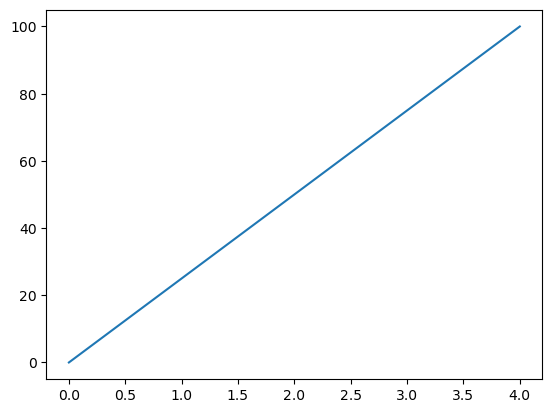

In [7]:
import numpy as np

xpts = np.array([0,4])
ypts = np.array([0,100])
plt.plot(xpts,ypts)
plt.show()

Appel avec les conditions initiales : 
 [  0.           0.         -12.19512195  40.6504065 ]
Appel perturbé : 
  [  0.           0.40650407 -12.24435841  44.48933285]
La solution du probleme est : 
 [0.000e+00 1.000e-02 2.000e-02 ... 1.699e+01 1.700e+01 1.701e+01] [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  2.03252033e-03 -1.22197402e-01  4.25698697e-01]
 [ 1.00004161e+00  8.51441205e-03 -2.44806776e-01  8.86313509e-01]
 ...
 [-1.74449351e+03 -3.15275875e+02  7.76311908e+04 -4.83535408e+02]
 [-1.74767044e+03 -3.17181310e+02  7.78510397e+04 -4.03150749e+02]
 [-1.75086241e+03 -3.18514756e+02  7.80673587e+04 -2.24822054e+02]]


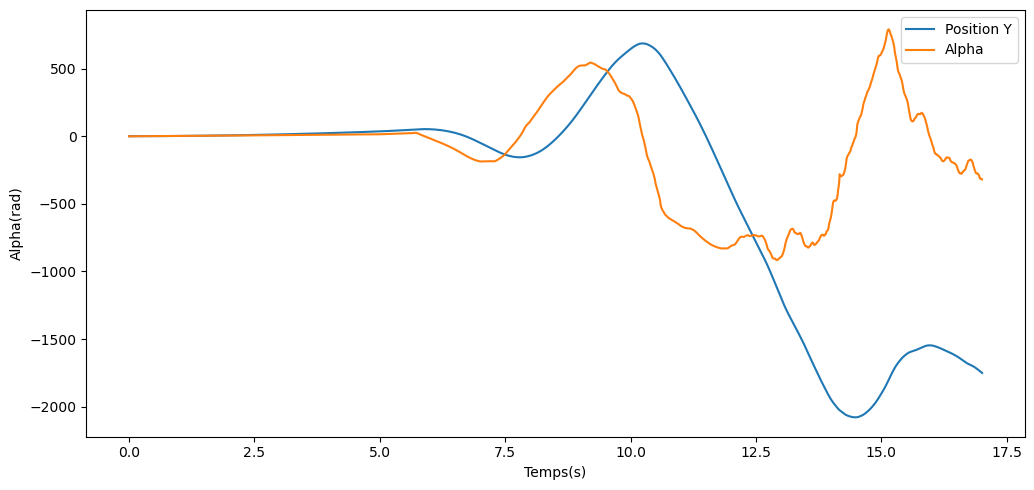

In [548]:
# RUNGE-KUTTA's METHODS :

def SystemeDiff(t,z):
    M1 = 50    #kg
    M2 = 20    #kg
    k = 5000   #N/m
    mu = 100   #Kg.S/m
    R = 0.3    #m
    g = 9.81
    numer = M2*g*np.sin(z[2])*np.cos(z[2]) + M2*R*((z[3])**2)*np.sin(z[2]) - mu*z[1] - k*z[0]
    denom = (M1 + 19*M2) - M2*(np.cos(z[2]))**2
    z3_dot = numer/ denom
    z4_dot = (-g*np.sin(z[2]) - z3_dot*np.cos(z[2]))/R
    return np.array([z[1],z[3],z3_dot,z4_dot])

t0 = 0.0
z0 = np.array([1.0,0.0,0.0,0.0])
dz0 = SystemeDiff(t0,z0)
print("Appel avec les conditions initiales : \n", dz0)

dz1 = SystemeDiff(t0 + 0.01 , z0 + 0.01*dz0)
print("Appel perturbé : \n " , dz1)


def RK2(f,t0,tf,z0,h) :
    t = np.arange(t0,tf+h,h)
    Z = np.zeros((len(t),len(z0)))
    Z[0] = z0
    for i in range(len(t) - 1) :
        k1 = f(t[i],Z[i])
        k2 = f(t[i] + h ,Z[i] + h*k1)
        Z[i+1] = Z[i] + (h/2)*(k1+k2)
    return t,Z

z0 = np.array([1.0 , 0.0 , 0.0 , 0.0])
t,Z = RK2(SystemeDiff , 0.0 , 17.0 , z0 ,0.01)
print("La solution du probleme est : \n", t,Z)

# PLOTS :
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.plot(t,Z[ : ,0], label = "Position Y")
plt.xlabel("Temps(s)")
plt.ylabel("Y(m)")
plt.legend()

plt.subplot(1,2,1)
plt.plot(t,Z[ : ,1], label = "Alpha")
plt.xlabel("Temps(s)")
plt.ylabel("Alpha(rad)")
plt.legend()
plt.tight_layout()




The solution of our problem is : 
 [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1

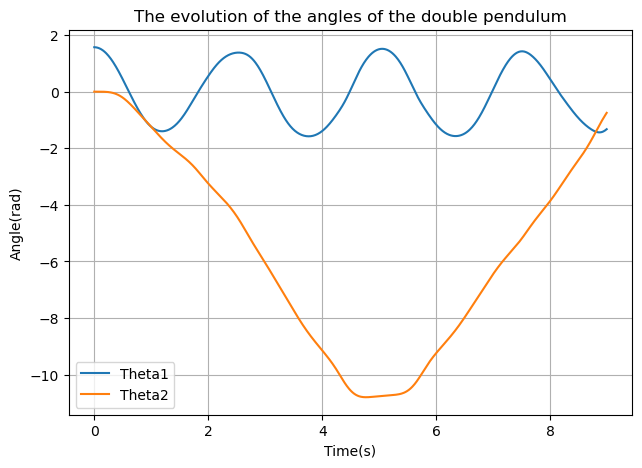

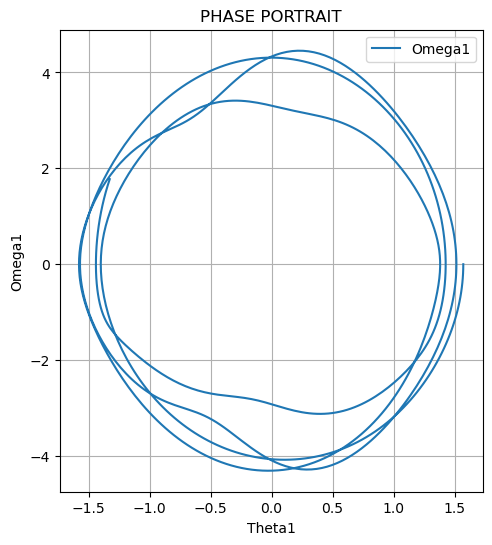

In [588]:
# DOUBLE PENDULUM :
def SystDiff(t,z) :
    m1 = 1    #kg
    m2 = 1    #kg
    l1 = 1    #kg
    l2 = 1    #kg
    g = 9.81  #m/s**2
    theta1 , theta2 , omega1 , omega2 = z
    A = np.array([[(m1+m2)*l1,m2*l2*np.cos(theta1 -theta2)],[m2*l1*np.cos(theta1-theta2),m2*l2]])
    B = np.array([-m2*l2*((omega2)**2)*np.sin(theta1 - theta2) - (m1+m2)*g*np.sin(theta1),-m1*l1*((omega1)**2)*np.sin(theta1 - theta2) - m2*g*np.sin(theta2)])
    S1,S2 = np.linalg.solve(A,B)
    return np.array([omega1,omega2,S1,S2])

def RK4(f,t0,tf,z0,h):
    t = np.arange(t0,tf,h)
    Z = np.zeros((len(t),len(z0)))
    Z[0] = z0
    for i in range(1,len(t)): 
        k1 = f(t[i-1],Z[i-1])
        k2 = f(t[i-1] + h/2 , Z[i-1] + (h/2)*k1)
        k3 = f(t[i-1] + h/2 , Z[i-1] +(h/2)*k2)
        k4 = f(t[i-1] + h , Z[i-1] + h*k3)
        Z[i] = Z[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return t,Z
z0 = np.array([np.pi/2 , 0.0 , 0.0 , 0.0])
t,Z = RK4(SystDiff, 0.0 , 9.0 , z0 , 0.01)
print("The solution of our problem is : \n", t,Z)

plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
plt.plot(t,Z[:, 0],label = "Theta1")
plt.plot(t,Z[:, 1], label = "Theta2")
plt.xlabel("Time(s)")
plt.ylabel("Angle(rad)")
plt.title("The evolution of the angles of the double pendulum")
plt.legend()
plt.grid()
plt.show()

# PHASE PORTRAIT :
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(Z[:, 0],Z[:, 2],label= "Omega1")
plt.xlabel("Theta1")
plt.ylabel("Omega1")
plt.title("PHASE PORTRAIT")
plt.legend()
plt.grid()
plt.show()



The solution is the following : 
 [0.000e+00 1.000e-02 2.000e-02 ... 4.997e+01 4.998e+01 4.999e+01] [[ 0.1         0.        ]
 [ 0.10005485  0.01095009]
 [ 0.1002186   0.02178091]
 ...
 [-0.49456709  1.10786844]
 [-0.4833873   1.12801687]
 [-0.47200821  1.14772861]]


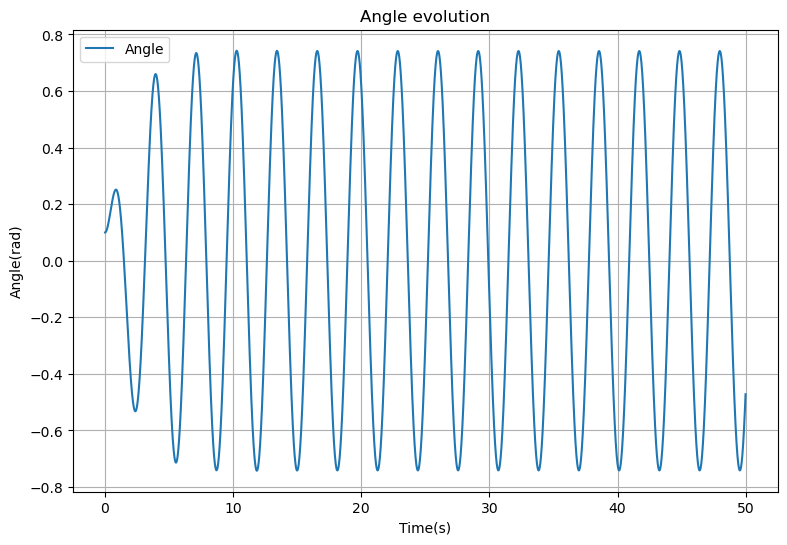

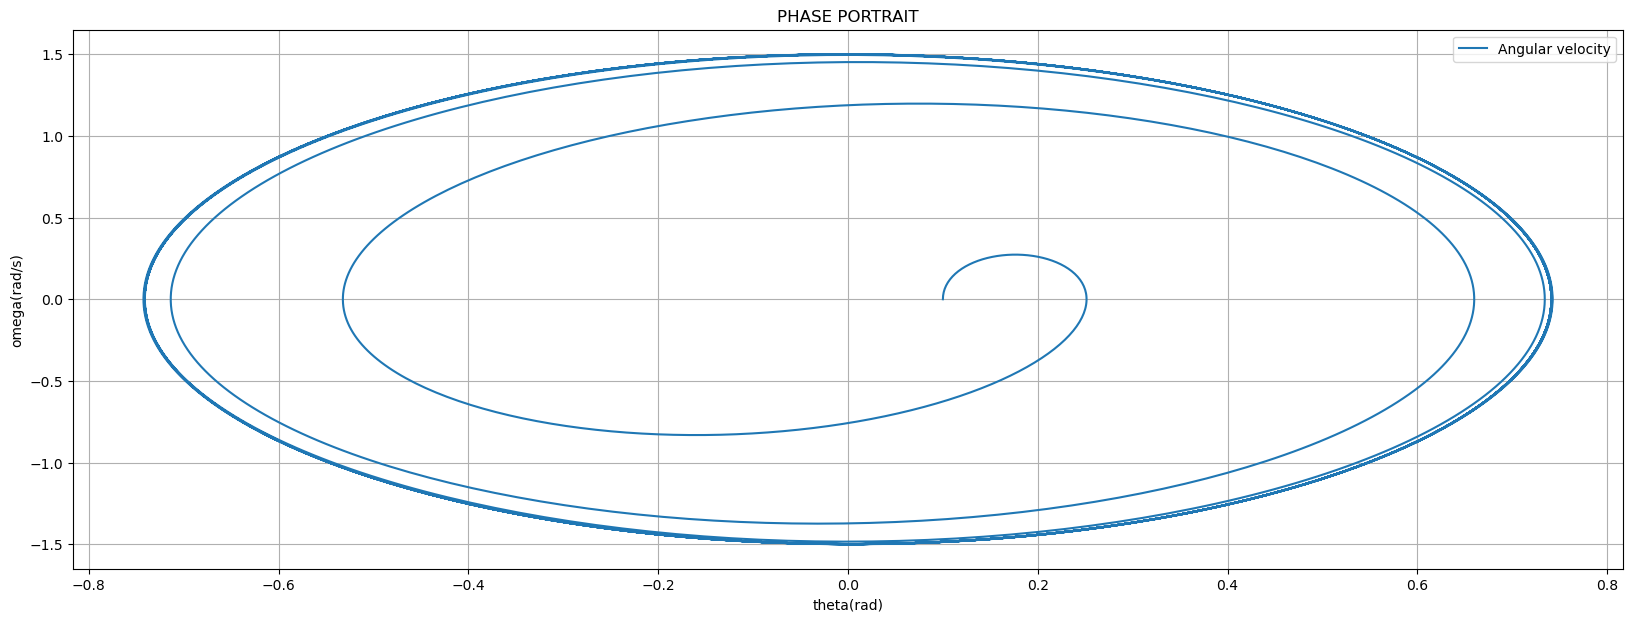

In [377]:
#FORCED AND DAMPED PENDULUM :
def SystDiff(t,z) :
    F = 1.5
    g = 9.81
    l = 2
    w = 2
    omeg0 = (g/l)**(1/2)
    alpha = 0.5
    theta, omega = z
    dtheta = omega
    domega = -2*alpha*omega - ((w)**2)*np.sin(theta) + F*np.cos(w*t)
    return np.array([dtheta,domega])


def RK4(f,t0,tf,z0,h):
    t = np.arange(t0,tf,h)
    Z = np.zeros((len(t),len(z0)))
    Z[0] = z0
    for i in range(1,len(t)):
        k1 = f(t[i-1],Z[i-1])
        k2 = f(t[i-1]+ h/2 , Z[i-1] + (h/2)*k1)
        k3 = f(t[i-1] + h/2 , Z[i-1] + (h/2)*k2)
        k4 = f(t[i-1] + h , Z[i-1] + h*k3)
        Z[i] = Z[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return t,Z

z0 = np.array([0.1 , 0.0])
t,Z = RK4(SystDiff, 0.0 , 50.0 , z0 , 0.01)
print("The solution is the following : \n", t,Z)


plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
plt.plot(t,Z[:, 0], label = "Angle")
plt.xlabel("Time(s)")
plt.ylabel("Angle(rad)")
plt.title("Angle evolution")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize = (20,7))
plt.plot(Z[:, 0],Z[:, 1],label = "Angular velocity")
plt.xlabel("theta(rad)")
plt.ylabel("omega(rad/s)")
plt.title("PHASE PORTRAIT")
plt.legend()
plt.grid()
plt.show()




First CALL : 
 [   0.         7664.           -8.94025202   -0.        ]
Second CALL : 
 [-8.94025202e-02  7.66400000e+03 -8.94025202e+00 -1.02616542e-04]
The Solution is : 
 [0.000e+00 1.000e-02 2.000e-02 ... 9.997e+01 9.998e+01 9.999e+01] [[ 6.67710000e+06  0.00000000e+00  0.00000000e+00  7.66400000e+03]
 [ 6.67710000e+06  7.66400000e+01 -8.94025202e-02  7.66400000e+03]
 [ 6.67710000e+06  1.53280000e+02 -1.78805040e-01  7.66400000e+03]
 ...
 [ 6.63247296e+06  7.64462321e+05 -8.91860518e+02  7.61277143e+03]
 [ 6.63246404e+06  7.64538449e+05 -8.91949351e+02  7.61276119e+03]
 [ 6.63245512e+06  7.64614576e+05 -8.92038185e+02  7.61275095e+03]]


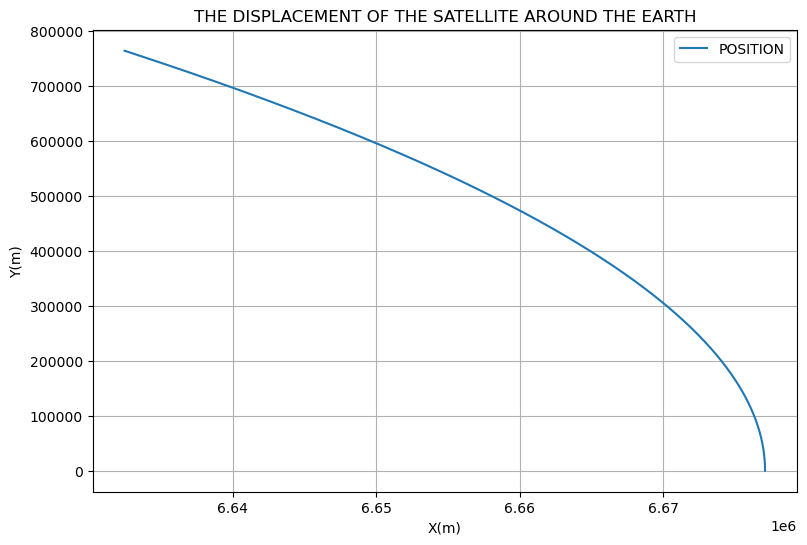

ENERGY IS ,
 2.1491999999998874e+33


In [461]:
# SATELLITES (ORBITAL MOVEMENT)
def SystDiff(t,z):
    M = 5.972e24     # Masse de la terre
    G = 6.6743e-11   # Gravitation universelle
    x,y,vx,vy = z
    C = (x**2 + y**2 )**(3/2)
    dvxdt = (-G*M*x)/C
    dvydt = (-G*M*y)/C
    return np.array([vx,vy,dvxdt,dvydt])
z0 =np.array([6.6771e6, 0.0 , 0.0 , 7664])
t0 = 0.0
dz0 = SystDiff(t0,z0)
dz1 = SystDiff(t0 + 0.01 , z0 + 0.01*dz0)
print("First CALL : \n", dz0)
print("Second CALL : \n",dz1)


def RK2(f,t0,tf,z0,h):
    t = np.arange(t0,tf,h)
    Z = np.zeros((len(t),len(z0)))
    Z[0] = z0
    for i in range(1,len(t)):
        k1 = f(t[i-1],Z[i-1])
        k2 = f(t[i-1] + h/2 , Z[i-1] + (h/2)*k1)
        k3 = f(t[i-1] + h/2 , Z[i-1] + (h/2)*k2)
        k4 = f(t[i-1] + h , Z[i-1] + h*k3)
        Z[i] = Z[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return t,Z

z0 = np.array([6.6771e6 , 0.0 , 0.0 , 7664])
t,Z = RK2(SystDiff,0.0 , 100.0 , z0 , 0.01)
print("The Solution is : \n", t,Z)

#PLOTS : 

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
plt.plot(Z[:, 0],Z[:, 1], label = "POSITION")
plt.xlabel("X(m)")
plt.ylabel("Y(m)")
plt.title("THE DISPLACEMENT OF THE SATELLITE AROUND THE EARTH")
plt.legend()
plt.grid()
plt.show()


def Energie(x,y,vx,vy) : 
    E =  0.5*M*(vx**2 + vy**2) - G*M*(np.sqrt(x**2 + y**2))
    return E

M = 5.97e27
G = 6.67e-11
E = Energie(200 , 200 , 600 , 600)
print("ENERGY IS ,\n", E)




In [550]:
# ADAMS-BASHFORTH'S METHODS :
# APPLICATION : SIMPLE PENDULUM

def DiffSystem(t,z):
    g = 9.81      # Gravity's acceleration
    l = 3         # Rope's length
    wo = (g/l)**(1/2)    # Undamped Natural angular frequency(velocity)
    theta,omega = z
    dtheta = omega
    domega = (-(wo)**2)*np.sin(theta)
    return np.array([omega,domega])






         



    

With initial conditions : 
 [ 0.          0.          0.          0.         -0.1         0.13333333]
Our solution to the problem is : 
 [0.000e+00 1.000e-02 2.000e-02 ... 4.997e+01 4.998e+01 4.999e+01] [[ 0.00000000e+00  0.00000000e+00 -4.00000000e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.38888889e-11 -4.99996528e-06 -3.99993333e-01 -5.55555556e-09
  -9.99986111e-04  1.33332037e-03]
 [-2.22218750e-10 -1.99994444e-05 -3.99973334e-01 -4.44431945e-08
  -1.99988889e-03  2.66656296e-03]
 ...
 [-1.81492315e-01 -2.19071464e-01 -4.22215962e-02 -4.71927832e-03
   9.35793523e-02 -1.40567038e-01]
 [-1.81537103e-01 -2.18133004e-01 -4.36302011e-02 -4.23785317e-03
   9.41112644e-02 -1.41152628e-01]
 [-1.81577061e-01 -2.17189266e-01 -4.50446226e-02 -3.75300851e-03
   9.46348362e-02 -1.41730377e-01]]


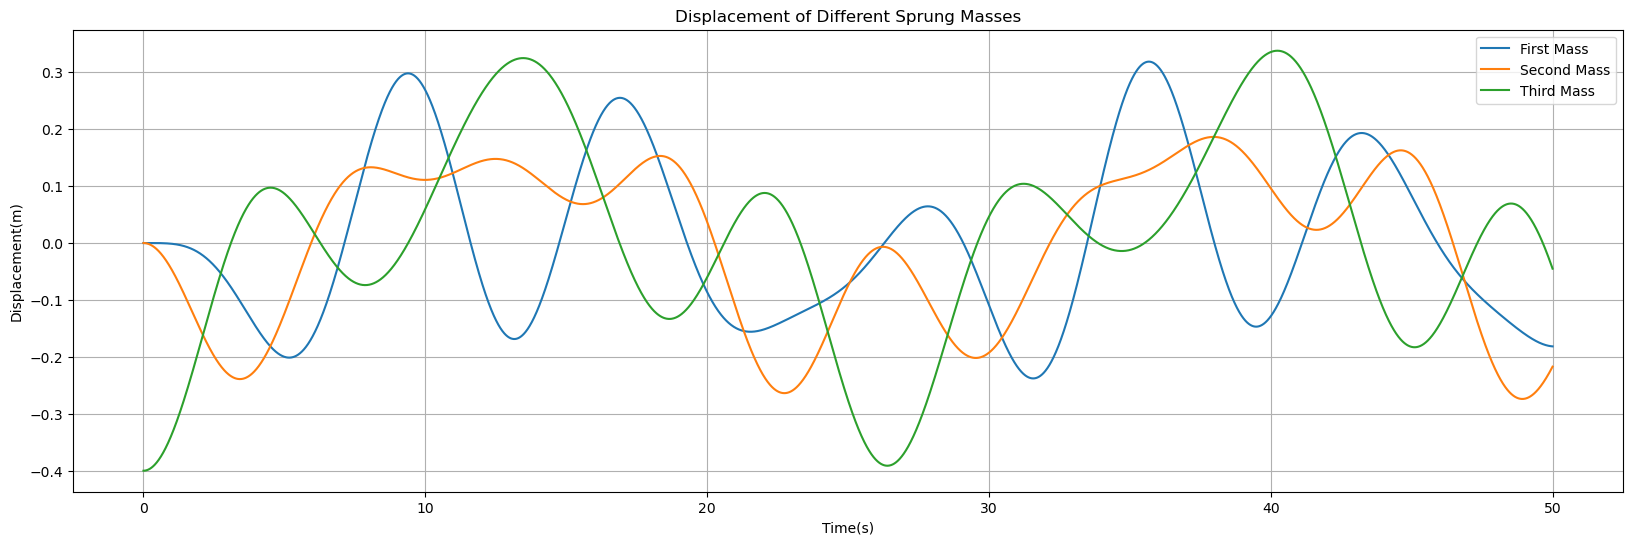

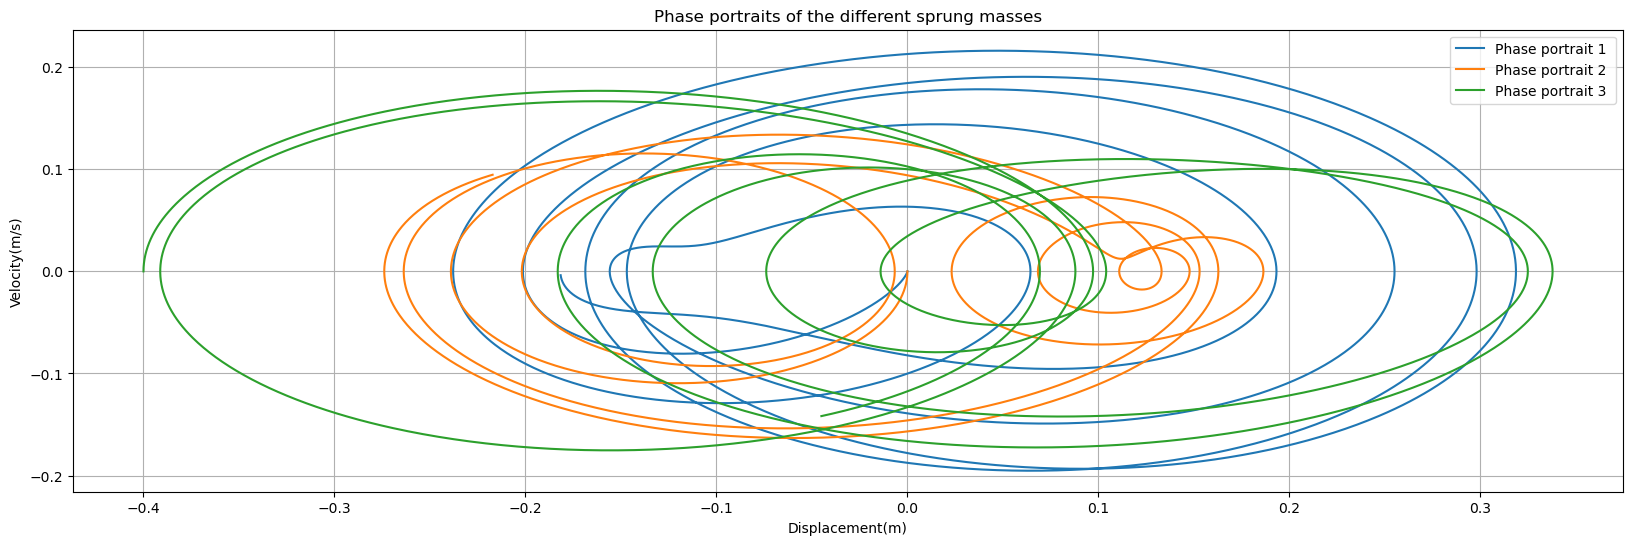

In [584]:
#Three Coupled Sprung Bodies System (That i failed to code during the test not for being dumb, but because of the wrecked college's rigs, HUUUUZILAT)

def SystemDiff(t,Y):
    M1 = 30
    M2 = 40
    M3 = 30
    K1 = K2 = K3 = 10
    Y1 , Y2 , Y3 , Y4 , Y5 , Y6 = Y
    Y4_dot = (-(K1+K2)/M1)*Y1 + (K2/M1)*Y2
    Y5_dot = (K2/M2)*Y1 + (-(K2+K3)/M2)*Y2 + (K3/M2)*Y3
    Y6_dot = (K3/M3)*Y2 - (K3/M3)*Y3
    return np.array([Y4,Y5,Y6,Y4_dot,Y5_dot,Y6_dot])
Y0 = np.array([0.0,0.0,-0.4,0.0,0.0,0.0])
t0 = 0.0
dY0 = SystemDiff(t0,Y0)
print("With initial conditions : \n", dY0)

def RK4(f,t0,tf,Y0,h):
    t = np.arange(t0,tf,h)
    y = np.zeros((len(t),len(Y0)))
    y[0] = Y0
    for i in range(1,len(t)):
        k1 = f(t[i-1],y[i-1])
        k2 = f(t[i-1] + h/2 , y[i-1] + (h/2)*k1)
        k3 = f(t[i-1] + h/2 , y[i-1] + (h/2)*k2)
        k4 = f(t[i-1] + h , y[i-1] + h*k3)
        y[i] = y[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return t,y
Y = np.array([0.0,0.0,-0.4,0.0,0.0,0.0])
t,y = RK4(SystemDiff , 0.0 , 50.0 , Y0 , 0.01)
print("Our solution to the problem is : \n" , t,y)

plt.figure(figsize = (20,6))
plt.subplot(1,1,1)
plt.plot(t,y[:, 0] , label = "First Mass")
plt.plot(t,y[:, 1] , label = "Second Mass")
plt.plot(t,y[:, 2] , label = "Third Mass")
plt.xlabel("Time(s)")
plt.ylabel("Displacement(m)")
plt.title("Displacement of Different Sprung Masses")
plt.legend()
plt.grid()
plt.show()

#PHASE PORTRAITS :
plt.figure(figsize =(20,6))
plt.plot(y[:, 0],y[:, 3],label = "Phase portrait 1 ")
plt.plot(y[:, 1],y[: , 4],label = "Phase portrait 2 ")
plt.plot(y[:, 2],y[: ,5] , label = "Phase portrait 3 ")
plt.xlabel("Displacement(m)")
plt.ylabel("Velocity(m/s)")
plt.title("Phase portraits of the different sprung masses")
plt.legend()
plt.grid()
plt.show()

Iter 1: u = 0.000000e+00, R = 1.000000e+04
Iter 2: u = 4.761905e-04, R = -8.967618e-10
Convergence atteinte


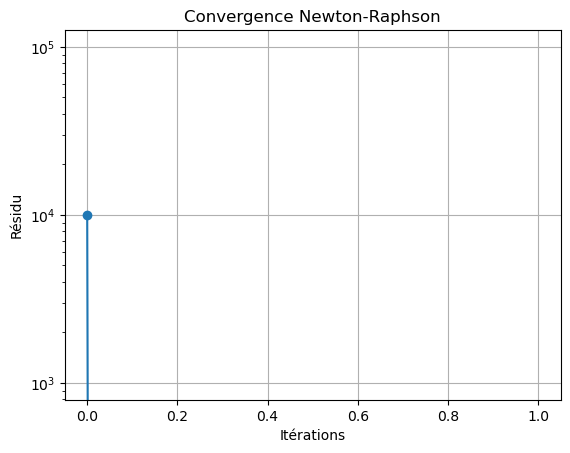

In [570]:
import numpy as np
import matplotlib.pyplot as plt

# Données matériau et géométrie
E = 210e9         # module de Young (Pa)
A = 1e-4           # section (m^2)
L0 = 1.0           # longueur initiale (m)
F_ext = 1e4        # force externe (N)

# Paramètres Newton-Raphson
tol = 1e-6
max_iter = 20
u = 0.0  # déplacement initial
du = 0.0

def F_int(u):
    """Force interne non linéaire, dépend du déplacement"""
    l = L0 + u
    epsilon = (l - L0) / L0
    return E * A * epsilon

def K_tangent(u):
    """Raideur tangente (dérivée de F_int par rapport à u)"""
    return E * A / L0

# Boucle de Newton-Raphson
residuals = []
for i in range(max_iter):
    R = F_ext - F_int(u)
    residuals.append(R)
    print(f"Iter {i+1}: u = {u:.6e}, R = {R:.6e}")
    
    if abs(R) < tol:
        print("Convergence atteinte")
        break
    
    K = K_tangent(u)
    du = R / K
    u += du

else:
    print("Non-convergence après max_iter")

# Affichage de la convergence
plt.semilogy(residuals, marker='o')
plt.xlabel("Itérations")
plt.ylabel("Résidu")
plt.grid(True)
plt.title("Convergence Newton-Raphson")
plt.show()



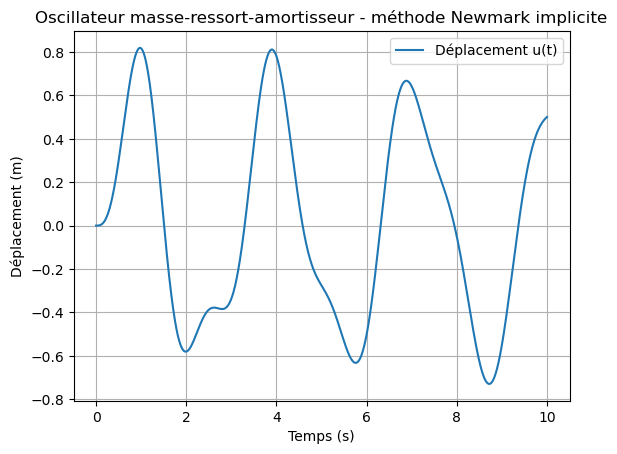

In [572]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres physiques
m = 1.0       # masse (kg)
c = 0.2       # amortissement (Ns/m)
k = 20.0      # raideur (N/m)

# Forçage
def F(t):
    return 10 * np.sin(2 * t)

# Paramètres Newmark
beta = 1/4
gamma = 1/2
dt = 0.01    # pas de temps
T = 10       # durée totale (s)

# Nombre de pas
N = int(T/dt) + 1

# Initialisation des vecteurs
u = np.zeros(N)
v = np.zeros(N)  # vitesse
a = np.zeros(N)  # accélération

# Conditions initiales
u[0] = 0.0
v[0] = 0.0
a[0] = (F(0) - c * v[0] - k * u[0]) / m

# Coefficients auxiliaires
a0 = 1/(beta * dt**2)
a1 = gamma/(beta * dt)
a2 = 1/(beta * dt)
a3 = 1/(2*beta) - 1
a4 = gamma/beta - 1
a5 = dt * (gamma/(2*beta) - 1)

# Matrice efficace (scalaire ici)
K_eff = k + a0 * m + a1 * c

# Boucle temporelle
for i in range(N-1):
    t_next = (i+1)*dt
    # Terme de forçage modifié
    F_eff = F(t_next) + m * (a0 * u[i] + a2 * v[i] + a3 * a[i]) + c * (a1 * u[i] + a4 * v[i] + a5 * a[i])
    # Calcul déplacement
    u[i+1] = F_eff / K_eff
    # Calcul accélération
    a[i+1] = a0 * (u[i+1] - u[i]) - a2 * v[i] - a3 * a[i]
    # Calcul vitesse
    v[i+1] = v[i] + dt * ((1 - gamma) * a[i] + gamma * a[i+1])

# Affichage
time = np.linspace(0, T, N)
plt.plot(time, u, label='Déplacement u(t)')
plt.title("Oscillateur masse-ressort-amortisseur - méthode Newmark implicite")
plt.xlabel("Temps (s)")
plt.ylabel("Déplacement (m)")
plt.grid()
plt.legend()
plt.show()
